___
# Ciência dos Dados - PROJETO 1

## Gabriel Lopes Monteiro

___

## A Evolução da TV no Brasil

___
## Introdução

Em meados de 1920, se iniciou testes para a criação de um aparelho que dominou o mundo. Em 2013, cerca de 79% das casas no mundo possuiam uma televisão. Ao longo de todos esses anos, o aparelho passou por melhoras visuais e funcionais, como por exemplo imagens a cores e acesso a internet.
No Brasil , a televisão foi introduzida nos anos 50 pelo empresário Assis Chateaubriand. O equipamento era um objeto de luxo, com pouco acesso a população. A tradição era em uma família que obtia o objeto na sala sentasse junto e até com vizinhos para assistir poucos canais em um tela bem pequena. Hoje , não é difícil encontrar casas com mais de uma televisão em diferentes cômodos e telas com tamanhos cada vez maiores. Uma pesquisa realizada pela FGV em 2014 mostrou que o Brasil teria uma televisão por habitante. Junto a essa estatística que se mostra um certo progresso, existe um certo regresso ao ver em que com todos esses avanços tecnológicos , 50% dos domicílios brasileiros possuem apenas TV de tubo (segundo o site de notícias G1) e 13 milhões possuem apenas sinal analógico aberto .
Com esse intuito, esse estudo busca entender o avanço da forma de se ver TV no Brasil nos últimos anos, em relação a posse do equipamento pelos brasileiros e a modernização do mesmo.


Referências:
História da TV :
https://www.tecmundo.com.br/projetor/2397-historia-da-televisao.htm
https://www.nyu.edu/classes/stephens/History%20of%20Television%20page.htm
Estatísticas:
http://economia.estadao.com.br/noticias/geral,brasil-tera-em-2014-uma-televisao-por-habitante-diz-fgv,182825e
http://g1.globo.com/tecnologia/noticia/2015/04/mais-de-50-de-domicilios-brasileiros-tem-apenas-tv-de-tubo-diz-ibge.html
http://economia.ig.com.br/2016-12-22/treze-milhoes-de-domicilios-no-brasil-so-tem-tv-analogica-aberta.html


## Perguntas

Tema : Evolução da forma de se assistir TV no Brasil em suas diferentes regiões.

Ponto principal: Qual a forma de se assistir TV mais predominante de cada região brasileira ao longo dos últimos anos?(quanto ao modelo de TV e o sinal recebido)

Para isso , será necessário responder:

-Qual a distribuição de sinal mais presente em cada região?

-Qual a quantidade e o aparelho de TV se usa?

-Qual a relação de componentes(pessoas) com o número de TV existente em cada casa?

Por fim, encontrar as diferenças do perfil entre as regiões e a evolução ao longo dos 3 anos estudados.


___
## Análise e Resultados

In [65]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [66]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\gabri\OneDrive\Documentos\Insper\2_semestre\Ciência dos Dados\Projeto1


In [67]:
#Se usar o arquivo descompactado
#pd.read_csv('DOM2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [68]:
# Separando Região
pnad2015 = pd.read_csv("DOM2015.csv",sep = ",")
pnad2015.loc[(pnad2015.UF==11) | (pnad2015.UF==12) | (pnad2015.UF==13) | (pnad2015.UF==14) | (pnad2015.UF==15) | (pnad2015.UF==16) | (pnad2015.UF==17),"REGIAO"] = "Norte"
pnad2015.loc[(pnad2015.UF==21)|(pnad2015.UF==22)|(pnad2015.UF==23)|(pnad2015.UF==24)|(pnad2015.UF==25)|(pnad2015.UF==26)|(pnad2015.UF==27)|(pnad2015.UF==28)|(pnad2015.UF==29),"REGIAO"] = "Nordeste"
pnad2015.loc[(pnad2015.UF==31)|(pnad2015.UF==32)|(pnad2015.UF==33)|(pnad2015.UF==35),"REGIAO"] = "Sudeste"
pnad2015.loc[(pnad2015.UF==50)|(pnad2015.UF==51)|(pnad2015.UF==52)|(pnad2015.UF==53),"REGIAO"] = "Centro-Oeste" 
pnad2015.loc[(pnad2015.UF==41)|(pnad2015.UF==42)|(pnad2015.UF==43),"REGIAO"] = "Sul"

# Transformando em categoria
pnad2015.TVcor = pnad2015.V0226.astype('category')
pnad2015.TVpretoebranco = pnad2015.V0227.astype('category')
pnad2015.TVtelafina = pnad2015.V02270.astype('float')
pnad2015.TVtubo = pnad2015.V02271.astype('float')
pnad2015.TVassinatura = pnad2015.V02272.astype('category')
pnad2015.TVdigitalaberta = pnad2015.V02273.astype('category')
pnad2015.REGIAO = pnad2015.REGIAO.astype('category')
pnad2015.Componentes = pnad2015.V4620.astype('category')

# Transformando números em palavras 
pnad2015.TVpretoebranco.cat.categories = (['Sim', 'Não'])
pnad2015.TVassinatura.cat.categories = (['Sim', 'Não'])
pnad2015.TVdigitalaberta.cat.categories  = (['Sim', 'Não','Não sabe'])

# Separando as colunas de interesse
pnad2015 = pd.concat([pnad2015.TVtelafina,pnad2015.TVtubo,pnad2015.TVassinatura,pnad2015.TVdigitalaberta,pnad2015.REGIAO,pnad2015.Componentes], axis = 1)
pnad2015.columns = ['Quantidade de TV tela fina','Quantidade de TV de tubo','Possui TV por assinatura','Possui sinal de TV digital aberta','REGIÃO','Componentes']

# Tipo de sinal de TV
pnad2015.loc[(pnad2015['Possui TV por assinatura']=='Sim'),'Sinal'] = 'Por assinatura'
pnad2015.loc[(pnad2015['Possui sinal de TV digital aberta']=='Sim'),'Sinal'] = 'Digital aberta'
pnad2015.loc[(pnad2015['Possui sinal de TV digital aberta']=='Não')&(pnad2015['Possui TV por assinatura']=='Não'),'Sinal'] = 'Analógico'
pnad2015.Sinal = pnad2015.Sinal.astype('category')

#Tipo de TV
pnad2015.loc[(pnad2015['Quantidade de TV de tubo']>0)&(pnad2015['Quantidade de TV tela fina']==0),'Tipo de TV'] = 'TV de tubo'
pnad2015.loc[(pnad2015['Quantidade de TV de tubo']==0)&(pnad2015['Quantidade de TV tela fina']>0),'Tipo de TV'] = 'TV de tela fina'
pnad2015.loc[(pnad2015['Quantidade de TV de tubo']>0)&(pnad2015['Quantidade de TV tela fina']>0),'Tipo de TV'] = 'Ambas'
pnad2015['Tipo de TV'] = pnad2015['Tipo de TV'].astype('category')

# Salvando pnad2015
pnad2015.to_csv('pnad2015_projeto.csv', sep=',')

# Filtragem de linha
pnad2015 = pnad2015.dropna()

pnad2015  

,Quantidade de TV tela fina,Quantidade de TV de tubo,Possui TV por assinatura,Possui sinal de TV digital aberta,REGIÃO,Componentes,Sinal,Tipo de TV
0,1.0,0.0,Não,Sim,Norte,1.0,Digital aberta,TV de tela fina
3,1.0,0.0,Não,Sim,Norte,6.0,Digital aberta,TV de tela fina
5,0.0,2.0,Não,Sim,Norte,1.0,Digital aberta,TV de tubo
6,0.0,1.0,Não,Sim,Norte,2.0,Digital aberta,TV de tubo
7,0.0,1.0,Não,Sim,Norte,3.0,Digital aberta,TV de tubo
8,1.0,0.0,Não,Sim,Norte,5.0,Digital aberta,TV de tela fina
10,1.0,0.0,Sim,Sim,Norte,3.0,Digital aberta,TV de tela fina
11,1.0,1.0,Não,Sim,Norte,1.0,Digital aberta,Ambas
13,1.0,0.0,Não,Sim,Norte,2.0,Digital aberta,TV de tela fina
15,1.0,0.0,Não,Sim,Norte,3.0,Digital aberta,TV de tela fina


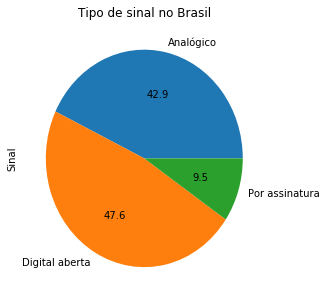

In [69]:
# Tabela univariada de frequência relativa do sinal de TV no Brasil
fr_sinal = (pnad2015.Sinal.value_counts(sort=False, normalize=True)*100).round(decimals=1)

# Gráfico de Setor
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = fr_sinal.plot(kind='pie',title='Tipo de sinal no Brasil',autopct='%.1f')
 

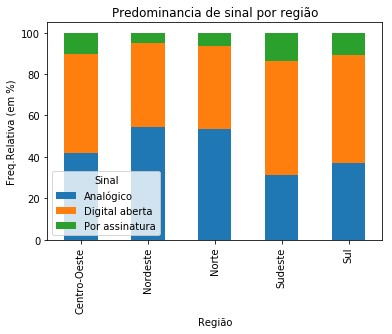

In [70]:

sinal_regiao = (pd.crosstab(pnad2015['REGIÃO'],pnad2015.Sinal,margins=True,rownames=['Região'], colnames=['Sinal'], normalize='index')*100)


plot = sinal_regiao.iloc[0:5,].plot(kind='bar', stacked=True,title='Predominancia de sinal por região')
plt.ylabel('Freq.Relativa (em %)')


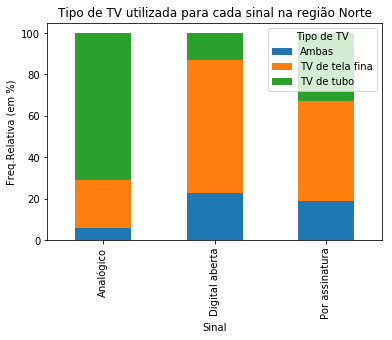

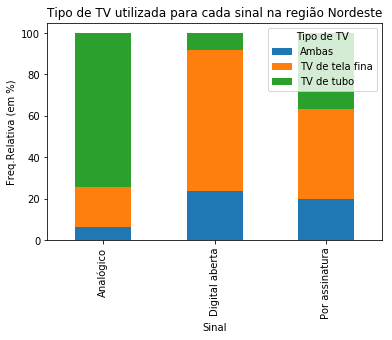

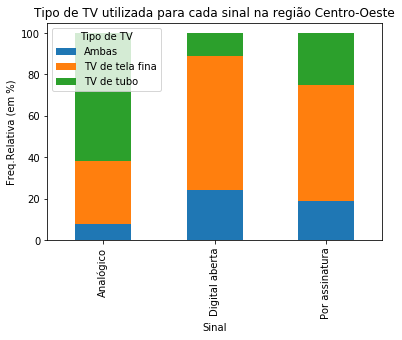

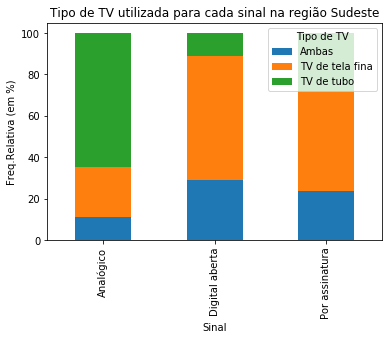

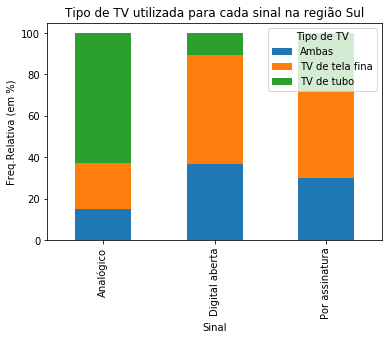

In [71]:
#Norte
TV_sinal_Norte = (pd.crosstab(pnad2015.Sinal[pnad2015['REGIÃO']=='Norte'],pnad2015['Tipo de TV'][pnad2015['REGIÃO']=='Norte'],margins=True,rownames=['Sinal'], colnames=['Tipo de TV'], normalize='index')*100)
plot = TV_sinal_Norte.iloc[0:3,].plot(kind='bar', stacked=True,title='Tipo de TV utilizada para cada sinal na região Norte')
plt.ylabel('Freq.Relativa (em %)')

#Nordeste
TV_sinal_Nordeste = (pd.crosstab(pnad2015.Sinal[pnad2015['REGIÃO']=='Nordeste'],pnad2015['Tipo de TV'][pnad2015['REGIÃO']=='Nordeste'],margins=True,rownames=['Sinal'], colnames=['Tipo de TV'], normalize='index')*100)
plot = TV_sinal_Nordeste.iloc[0:3,].plot(kind='bar', stacked=True,title='Tipo de TV utilizada para cada sinal na região Nordeste')
plt.ylabel('Freq.Relativa (em %)')

#Centro-Oeste
TV_sinal_Centro_Oeste = (pd.crosstab(pnad2015.Sinal[pnad2015['REGIÃO']=='Centro-Oeste'],pnad2015['Tipo de TV'][pnad2015['REGIÃO']=='Centro-Oeste'],margins=True,rownames=['Sinal'], colnames=['Tipo de TV'], normalize='index')*100)
plot = TV_sinal_Centro_Oeste.iloc[0:3,].plot(kind='bar', stacked=True,title='Tipo de TV utilizada para cada sinal na região Centro-Oeste')
plt.ylabel('Freq.Relativa (em %)')

#Sudeste
TV_sinal_Sudeste = (pd.crosstab(pnad2015.Sinal[pnad2015['REGIÃO']=='Sudeste'],pnad2015['Tipo de TV'][pnad2015['REGIÃO']=='Sudeste'],margins=True,rownames=['Sinal'], colnames=['Tipo de TV'], normalize='index')*100)
plot = TV_sinal_Sudeste.iloc[0:3,].plot(kind='bar', stacked=True,title='Tipo de TV utilizada para cada sinal na região Sudeste')
plt.ylabel('Freq.Relativa (em %)')

#Sul
TV_sinal_Sul = (pd.crosstab(pnad2015.Sinal[pnad2015['REGIÃO']=='Sul'],pnad2015['Tipo de TV'][pnad2015['REGIÃO']=='Sul'],margins=True,rownames=['Sinal'], colnames=['Tipo de TV'], normalize='index')*100)
plot = TV_sinal_Sul.iloc[0:3,].plot(kind='bar', stacked=True,title='Tipo de TV utilizada para cada sinal na região Sul')
plt.ylabel('Freq.Relativa (em %)')


In [72]:
#Norte
#caracteristicas 
pnad2015['Quantidade de TV tela fina'].describe()
#densidade com variáveis contínuas discretas?


count    109999.000000
mean          0.887981
std           0.903072
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: Quantidade de TV tela fina, dtype: float64

Covariancia = 0.16172457102109195


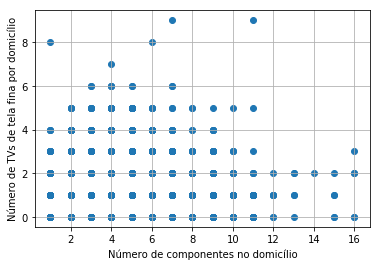

Covariancia = 0.11743450169014796


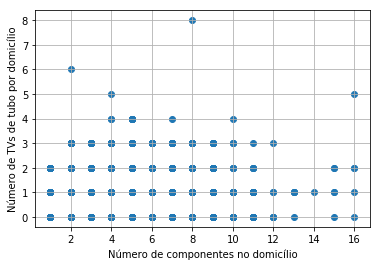

In [73]:
# Gráficos de disperção por número de Tvs por número de moradores?

# Norte
covariancia = pnad2015['Componentes'][pnad2015['REGIÃO']=='Norte'].cov(pnad2015['Quantidade de TV tela fina'][pnad2015['REGIÃO']=='Norte'])
print("Covariancia = {}".format(covariancia))
plt.scatter(x = pnad2015['Componentes'][pnad2015['REGIÃO']=='Norte'],
            y = pnad2015['Quantidade de TV tela fina'][pnad2015['REGIÃO']=='Norte'])
plt.ylabel('Número de TVs de tela fina por domicílio')
plt.xlabel('Número de componentes no domicílio')
plt.grid()
plt.show()

covariancia = pnad2015['Componentes'][pnad2015['REGIÃO']=='Norte'].cov(pnad2015['Quantidade de TV de tubo'][pnad2015['REGIÃO']=='Norte'])
print("Covariancia = {}".format(covariancia))
plt.scatter(x = pnad2015['Componentes'][pnad2015['REGIÃO']=='Norte'],
            y = pnad2015['Quantidade de TV de tubo'][pnad2015['REGIÃO']=='Norte'])
plt.ylabel('Número de TVs de tubo por domicílio')
plt.xlabel('Número de componentes no domicílio')
plt.grid()
plt.show()

# ___
## Conclusão 

Descreva aqui suas conclusões!

Trabalhos futuros : Analisar a situação do sinal analógico no território brasileiro, vide a futura campanha de desligamento desse sinal? Como está a distribuição do sinal digital ao longo do território Brasileiro?